# Exploratory Data Analysis of DC Bike Sharing

There are 3 key analyses that I will look at: 
- Exploring the distribution of riders
- Exploring the relationship between time and rider counts
- Exploring the relationship between weather and rider counts.

In [3]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

## Loading Data
The documentation for the data is as follows:
```
instant: record index
dteday : date
season : season (1:spring, 2:summer, 3:fall, 4:winter)
yr : year (0: 2011, 1:2012)
mnth : month ( 1 to 12)
hr : hour (0 to 23)
holiday : whether day is holiday or not
weekday : day of the week
workingday : if day is neither weekend nor holiday
weathersit :
    1: Clear or partly cloudy
    2: Mist + clouds
    3: Light Snow or Rain
    4: Heavy Rain or Snow
temp : Normalized temperature in Celsius (divided by 41)
atemp: Normalized feeling temperature in Celsius (divided by 50)
hum: Normalized percent humidity (divided by 100)
windspeed: Normalized wind speed (divided by 67)
casual: count of casual users
registered: count of registered users
cnt: count of total rental bikes including casual and registered
```

In [5]:
bike = pd.read_csv("data/bikeshare.txt")
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Preparation
I began by looking at the columns and checked 'holiday' and 'workingday'. 
- Confirmed with a calendar that [0,1] ->[no,yes] for 'holiday' and 'workingday'
- Confirmed with calendar to map numbers to days for 'weekday'
- Mapped 'weathersit' to weather descriptor

I decided to change all of these values to make the dataframe easier to read.

In [13]:
bike['holiday'] = bike['holiday'].replace([0,1], ['no','yes'], inplace=False)
bike['weekday'] = bike['weekday'].replace([0,1,2,3,4,5,6],['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
bike['workingday'] = bike['workingday'].replace([0,1],['no','yes'])
bike['weathersit'] = bike['weathersit'].replace([1,2,3,4],['Clear','Mist','Light','Heavy'])
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


# Daily Counts
The granuarity of the data that is provided is hourly. However, I believe it is incredibly useful to get daily statistics. 

daily_counts
* `'casual'`: total casual riders for each day
* `'registered'`: total registered riders for each day
* `'workingday'`: whether that day is a working day or not (yes or no)

In [14]:
counts = bike.filter(items=['dteday','casual','registered','workingday'])
daily_counts = counts.groupby('dteday').agg(sum)
daily_day = counts.groupby('dteday').agg(max)

daily_counts['workingday'] = daily_day['workingday']
daily_counts.head()

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes


# Exploring Rider Distribution
Using the daily number of riders, I will start with plotting casual riders against registered riders.

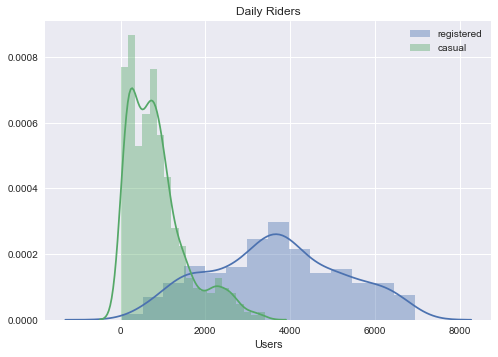

In [18]:
reg = [daily_counts['registered'],'registered']
cas = [daily_counts['casual'],'casual']
for a in [reg,cas]:
    sns.distplot(a[0],label=a[1])
plt.legend()
plt.title('Daily Riders')
plt.xlabel('Users')
plt.show()

From the graph, we can tell that causal users have a much smaller daily presence compared to registered users.

Registered users have a greater domain from 0 - 8000, while causal is very consistent around 0-2000 with a max of 4000.

## Density Plot

Next I will plot the registered against casual using a denisty plot to look at their relationship in relation to working day.

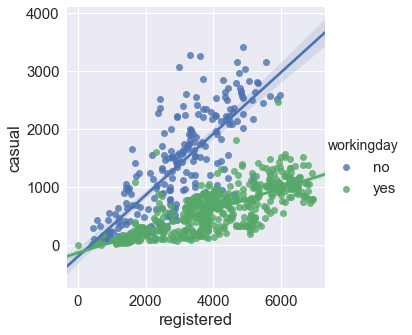

In [21]:
sns.set(font_scale=1.5)
sns.lmplot(data = daily_counts, x='registered', y='casual',hue='workingday')
plt.show()

The graph seems to show that the number of registered users rises on weekdays and lowers on weekends while casual users has the opposite trend.

However, this plot is not the best to make this conclusion as overplotting could have occured.

## Bivariate Kernal Density Plot
I can use a bivariate KDE to combat the overplotting from the previous graph.

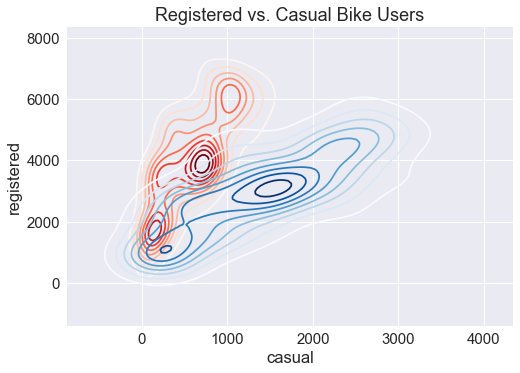

In [30]:
#working day riders
c_day = daily_counts[daily_counts['workingday'] ==  'yes']
r_day = daily_counts[daily_counts['workingday'] == 'yes']

#KDE plot for work day riders
sns.kdeplot(c_day['casual'], r_day['registered'], cmap="Reds", label = 'work day')

#non-working day riders
c_end = daily_counts[daily_counts['workingday'] ==  'no']
r_end = daily_counts[daily_counts['workingday'] == 'no']

#KDE plot for non-working day riders
sns.kdeplot(c_end['casual'], r_end['registered'], cmap="Blues", label = 'weekend')
plt.title('Registered vs. Casual Bike Users')
plt.show()

This plot allows us to see the hidden values, otherwise overplotted. 

# Exploring Trends in Time

Going back to the data, now I am going to look for trends by time and date.

- Plotting hourly bike sharing in the month of June
- Plotting daily patterns

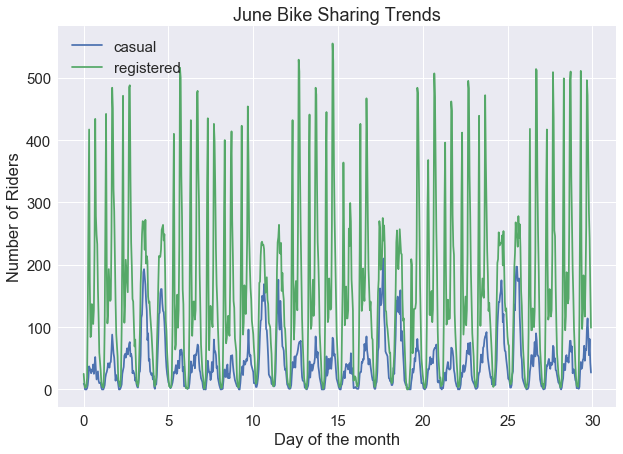

In [113]:
#manipulate dataset to get June dates
new_count = bike[3530:4250]
june_cas = new_count.filter(items=['dteday', 'hr','casual']).groupby(['dteday', 'hr']).sum()
plt.figure(figsize=(10, 7))
june_reg = new_count.filter(items=['dteday', 'hr','registered']).groupby(['dteday', 'hr']).sum()

#manipulate the x-axis to display days/times
day = [int(i[-2:]) for i in list(new_count['dteday'])]
hours = [int(i)*.04 for i in list(new_count['hr'])]
days = [(x + y) -1  for (x, y) in zip(day, hours)]

#plot the data
plt.plot(days, list(june_cas['casual']), label='casual')
plt.plot(days, list(june_reg['registered']), label='registered')
plt.legend()
plt.title('June Bike Sharing Trends')
plt.xlabel('Day of the month')
plt.ylabel('Number of Riders')
plt.show()

As we can see from the data, registered riders primarily use the service during the weekdays and have a dramatic dip on weekends. 

To the contrary, casual riders greatly increase on weekends and almost match the number of registered users.

# Daily Rider Activity

Next, we are going to plot the user activity for a given day and look for user trends.

First, I will plot the average activity per hour on the entire dataset and compare them to 3 graphs.
- Activity on a Weekday
- Acitvity on a Weekend
- Activity on a Holiday

Because we are going to be calling the same function to plot the graph for all 4 graphs I made a function to make the notebook cleaner.

In [152]:
#Graphing function
#Takes in dataframe(DF) and graph title(str)
def graph(df,title=''):
    cas = df.filter(items=['dteday', 'hr','casual']).groupby(['hr']).mean()
    reg = df.filter(items=['dteday', 'hr','registered']).groupby(['hr']).mean()
    plt.plot(cas, label='casual')
    plt.plot(reg, label='registered')
    plt.title(title)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Count')
    plt.legend()
    plt.show()

## Mean User Activity By Hour

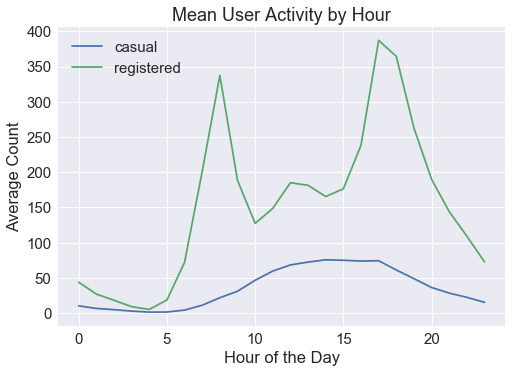

In [153]:
#plot the data
graph(bike, 'Mean User Activity by Hour')

We can see from the plot that registered users primarily use the serivce around 8am and 5pm, the beginning and end of the workday. 

## Activity on a Weekday

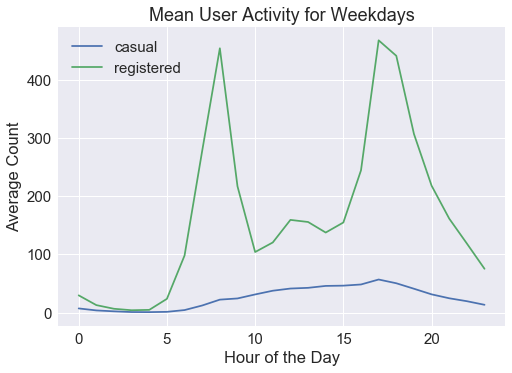

In [154]:
weekday_data = bike[bike['workingday']=='yes']
graph(weekday_data,'Mean User Activity for Weekdays')

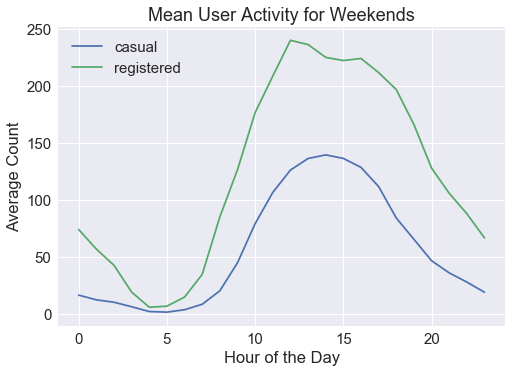

In [155]:
weekend_data = bike[bike['workingday']=='no']
graph(weekend_data, 'Mean User Activity for Weekends')

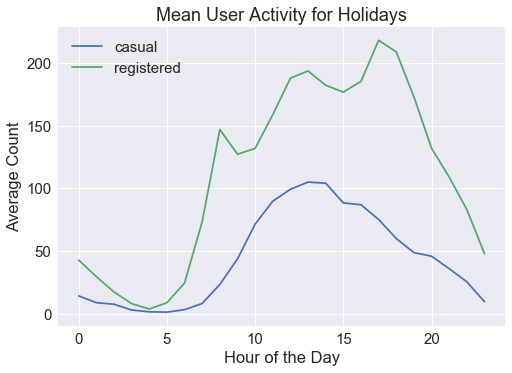

In [160]:
holiday_data = bike[bike['holiday']=='yes']
graph(holiday_data, 'Mean User Activity for Holidays')

We now have 4 distinct graphs of user data based on dates and plotted hourly. 

In each graph, we can see that there are on average more registered users than casual users. 

The mean over the whole year looks most similarly to the weekday graph, this is expected since out of the 3 categories (weekday, weekend, holiday) weekdays account for most of the days out of the year. 

# Exploring Weather Effects on Bike Sharing

First, I created a new column in bike called 'propCasual' which is the proportion of casual riders to todal riders for the given hour. 

This is useful to look at the effects of weather on riders. 

In [166]:
bike['propCasual'] = (bike['casual'] / (bike['casual'] + bike['registered']))
bike = bike.fillna(0)
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,propCasual
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1,0.000000


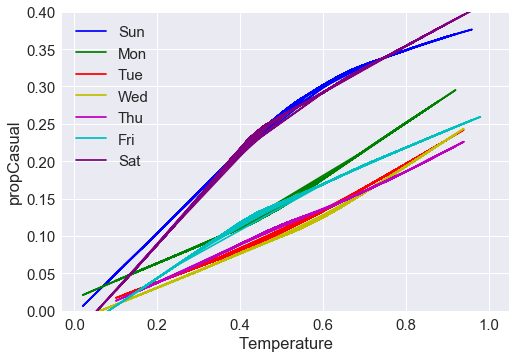

In [188]:
from statsmodels.nonparametric.smoothers_lowess import lowess

labels = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
colors = ['b','g','r','y','m','c','purple' ]
for i in range(7):   
    dayOfWeek = bike[bike['weekday']==labels[i]]
    ysmooth = lowess(dayOfWeek['temp'],dayOfWeek['propCasual'], return_sorted=False)
    x = dayOfWeek['temp']
    y = dayOfWeek['propCasual']
    ysmooth = lowess(y, x, return_sorted=False)
    plt.plot(x, ysmooth, 'r-', label = labels[i], color=colors[i])
plt.xlabel('Temperature')
plt.ylabel('propCasual')
plt.ylim(0,.4)
plt.legend()
plt.show()

The plot shows that Saturday and Sunday have the highest proportions of casual riders. 

This is consistent to the data that we observed in previous plots.

The new interesting information that this graphs shows is temperature's relationship with bike share rentals among casual users. The warmer the temperature, the higher the proportion of casual users. 

We cannot say that more users use the bike share during warmer weather as a third variable could be the cause. (ie. more casual users in Summer, there are warmer temperatures in Summer)